In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
df=pd.read_csv("height.csv")

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


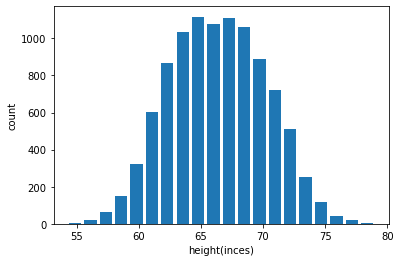

In [15]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel("height(inces)")
plt.ylabel("count")
plt.show()

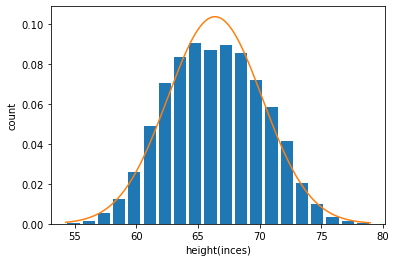

In [30]:


from scipy.stats import norm
import numpy as np
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel("height(inces)")
plt.ylabel("count")

rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))







In [32]:
df.Height.mean()

66.3675597548656

In [33]:
df.Height.std()

3.847528120795573

## (1) Outlier detection and removal using 3 standard deviation

In [38]:
higher_limit=df["Height"].mean()+3*df["Height"].std()
higher_limit

77.91014411725232

In [39]:
lower_limit=df["Height"].mean()-3*df["Height"].std()
lower_limit


54.824975392478876

In [41]:
df[df["Height"]>higher_limit]

,Height,Weight
994,78.095867,255.690835
1317,78.462053,227.342565
2014,78.998742,269.989698
3285,78.528210,253.889004
3757,78.621374,245.733783


In [42]:
df[df["Height"]<lower_limit]

,Height,Weight
6624,54.616858,71.393749
9285,54.263133,64.700127


In [ ]:
df[(df["Height"]>higher_limit) | (df["Height"]<lower_limit)] #total outliers

In [47]:
new_df=df[(df["Height"]<higher_limit) & (df["Height"]>lower_limit)]  # our data without outliers

In [49]:
new_df.shape

(9993, 2)

In [50]:
df.shape

(10000, 2)

## The same we can  do using z score

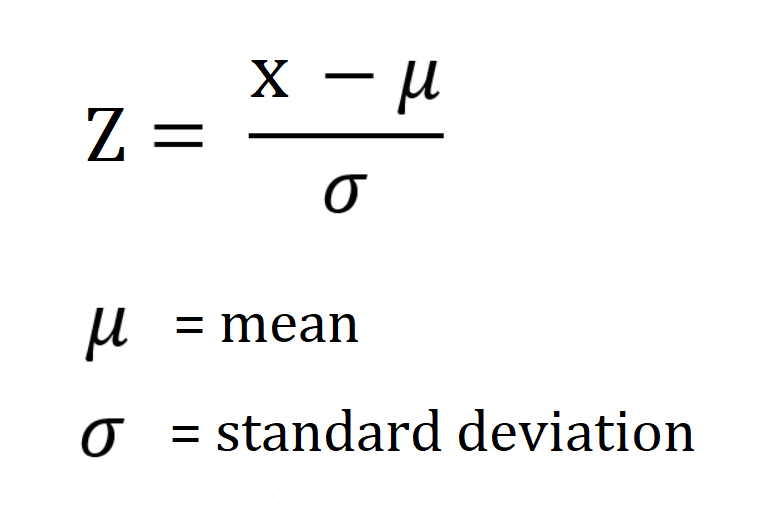

In [57]:
df["zscore"]=(df["Height"]-df["Height"].mean())/df["Height"].std()

In [58]:
df

,Height,Weight,zscore
0,73.847017,241.893563,1.943964
1,68.781904,162.310473,0.627505
2,74.110105,212.740856,2.012343
3,71.730978,220.042470,1.393991
4,69.881796,206.349801,0.913375
...,...,...,...
9995,66.172652,136.777454,-0.050658
9996,67.067155,170.867906,0.181830
9997,63.867992,128.475319,-0.649655
9998,69.034243,163.852461,0.693090


In [62]:
max_z=df[df["zscore"]>3]
max_z

,Height,Weight,zscore
994,78.095867,255.690835,3.048271
1317,78.462053,227.342565,3.143445
2014,78.998742,269.989698,3.282934
3285,78.528210,253.889004,3.160640
3757,78.621374,245.733783,3.184854


In [69]:
min_z=df[df["zscore"]<-3]
min_z

,Height,Weight,zscore
6624,54.616858,71.393749,-3.054091
9285,54.263133,64.700127,-3.146027


In [70]:
df[(df["zscore"]>3) | (df["zscore"]<-3)]

,Height,Weight,zscore
994,78.095867,255.690835,3.048271
1317,78.462053,227.342565,3.143445
2014,78.998742,269.989698,3.282934
3285,78.528210,253.889004,3.160640
3757,78.621374,245.733783,3.184854
6624,54.616858,71.393749,-3.054091
9285,54.263133,64.700127,-3.146027


In [71]:
df[(df["zscore"]<3) & (df["zscore"]>-3)]

,Height,Weight,zscore
0,73.847017,241.893563,1.943964
1,68.781904,162.310473,0.627505
2,74.110105,212.740856,2.012343
3,71.730978,220.042470,1.393991
4,69.881796,206.349801,0.913375
...,...,...,...
9995,66.172652,136.777454,-0.050658
9996,67.067155,170.867906,0.181830
9997,63.867992,128.475319,-0.649655
9998,69.034243,163.852461,0.693090
